# The Sparks Foundation - Data Science & Business Analytics Internship
***
## TASK 8 - Timeline Analysis Covid-19
***

    

### Intern name : Sai Sharanya Y

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv("owid-covid-data.csv")

In [5]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.270660e+05,127064.000000,126021.000000,1.158850e+05,116081.000000,126021.000000,126414.000000,126412.000000,125374.000000,115246.000000,...,90497.000000,89189.000000,58473.000000,105568.000000,124996.000000,116283.000000,4723.000000,4723.000000,4723.000000,4723.000000
mean,2.083665e+06,8410.174243,8418.394482,5.122848e+04,183.677932,168.382660,20237.752954,88.032398,87.823950,409.959714,...,10.589440,32.750255,50.857457,3.029077,73.260542,0.726159,32100.164662,8.719460,15.963438,787.609908
std,1.187368e+07,43793.662608,43217.101303,2.627460e+05,869.729270,816.038922,33556.654266,203.581007,172.604671,671.075485,...,10.502396,13.514232,31.820231,2.455173,7.530406,0.150035,90757.479961,15.970713,31.009795,1170.922433
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1728.844404
25%,2.447250e+03,3.000000,10.429000,8.200000e+01,0.000000,0.143000,422.998250,0.331000,1.655000,12.365000,...,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000,-162.700000,-0.950000,-0.795000,-41.664910
50%,2.810600e+04,105.000000,130.857000,7.620000e+02,2.000000,2.000000,3271.885000,11.362000,15.984500,82.757500,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,2361.900000,5.250000,6.630000,364.407252
75%,2.705228e+05,1087.000000,1141.714000,6.599000e+03,22.000000,18.714000,25593.300500,84.256000,93.740000,539.706750,...,19.300000,41.300000,83.241000,4.000000,78.740000,0.845000,20258.250000,13.565000,22.425000,1368.217535
max,2.566920e+08,908290.000000,827219.714000,5.140519e+06,18007.000000,14703.286000,245406.822000,8620.690000,3385.473000,6019.320000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,870830.300000,106.840000,373.610000,6170.365997


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134459 entries, 0 to 134458
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    134459 non-null  object 
 1   continent                                   125881 non-null  object 
 2   location                                    134459 non-null  object 
 3   date                                        134459 non-null  object 
 4   total_cases                                 127066 non-null  float64
 5   new_cases                                   127064 non-null  float64
 6   new_cases_smoothed                          126021 non-null  float64
 7   total_deaths                                115885 non-null  float64
 8   new_deaths                                  116081 non-null  float64
 9   new_deaths_smoothed                         126021 non-null  float64
 

In [8]:
df.shape

(134459, 67)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 67)


In [10]:
df.count()

iso_code                                   134459
continent                                  125881
location                                   134459
date                                       134459
total_cases                                127066
                                            ...  
human_development_index                    116283
excess_mortality_cumulative_absolute         4723
excess_mortality_cumulative                  4723
excess_mortality                             4723
excess_mortality_cumulative_per_million      4723
Length: 67, dtype: int64

In [11]:
# Checking the Missing or Null values

print(df.isnull().sum())

iso_code                                        0
continent                                    8578
location                                        0
date                                            0
total_cases                                  7393
                                            ...  
human_development_index                     18176
excess_mortality_cumulative_absolute       129736
excess_mortality_cumulative                129736
excess_mortality                           129736
excess_mortality_cumulative_per_million    129736
Length: 67, dtype: int64


In [12]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [13]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

E:\python anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2021-11-15,133438.0,10.0,4697.0,1517.0,1413253.0
2021-11-16,133505.0,67.0,4698.0,4467.0,1417720.0
2021-11-17,133557.0,52.0,4699.0,2841.0,1420561.0
2021-11-18,133593.0,36.0,4699.0,3925.0,1424486.0
2021-11-19,133593.0,0.0,4699.0,NaN,NaN


Text(0.5, 0, 'Month')

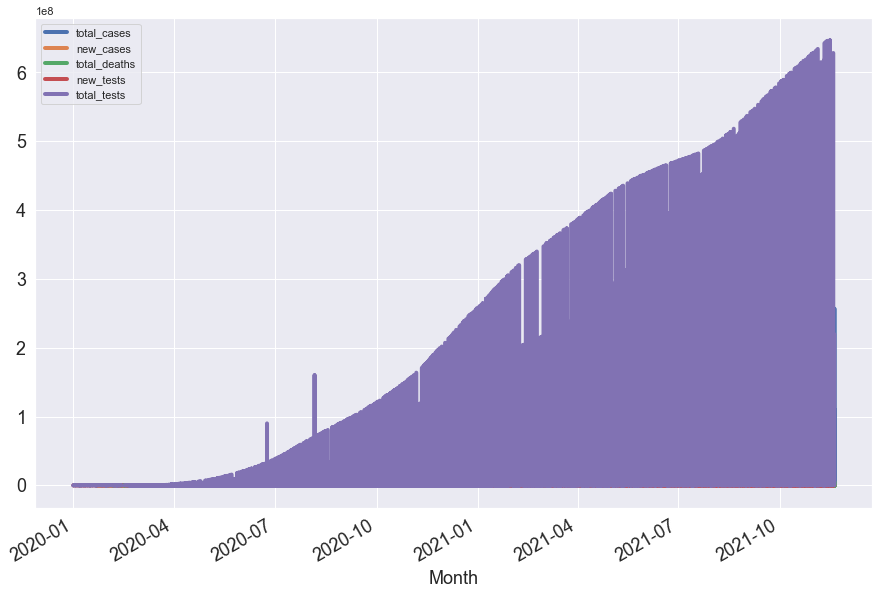

In [15]:
df1.plot(figsize = (15 , 10), linewidth = 4, fontsize = 18)
plt.xlabel('Month', fontsize = 18)

Text(0.5, 0, 'Month')

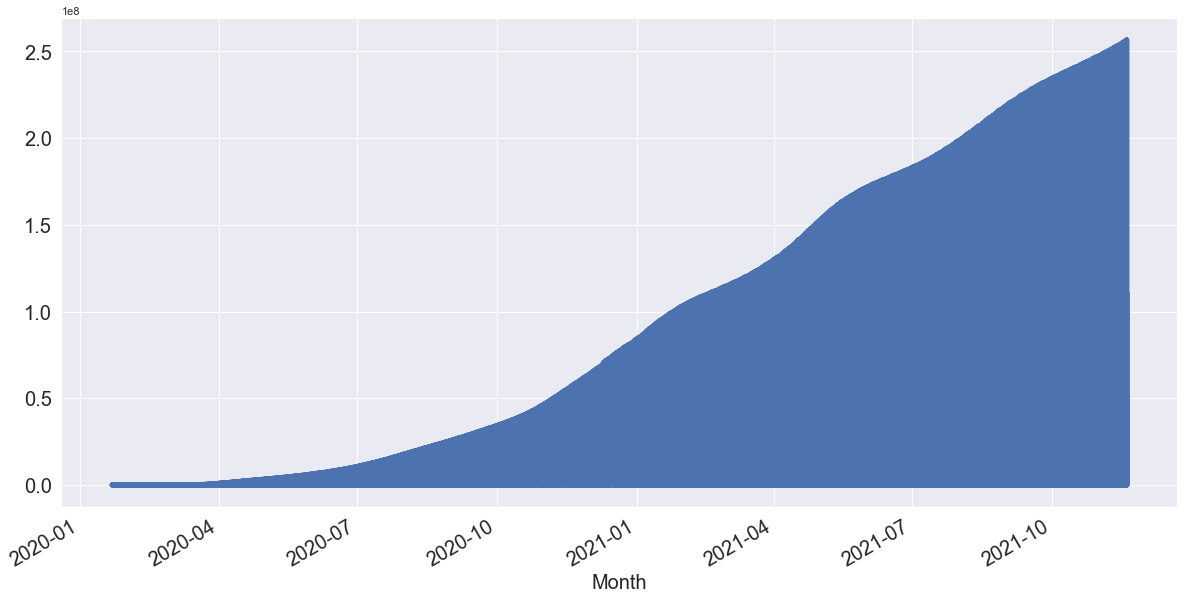

In [16]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

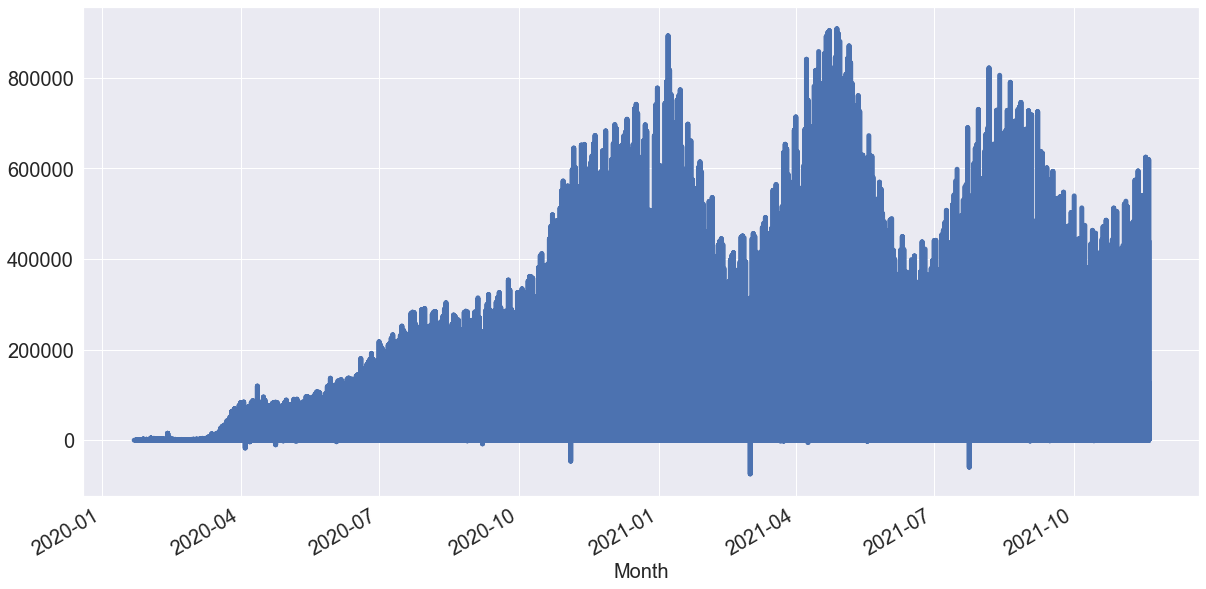

In [17]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

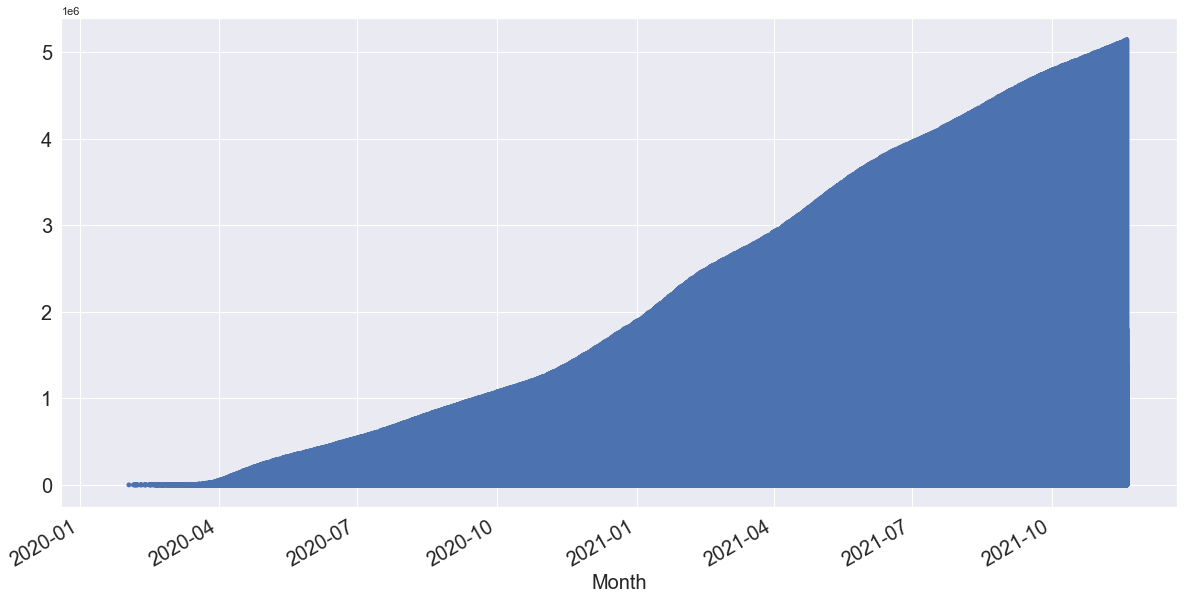

In [18]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

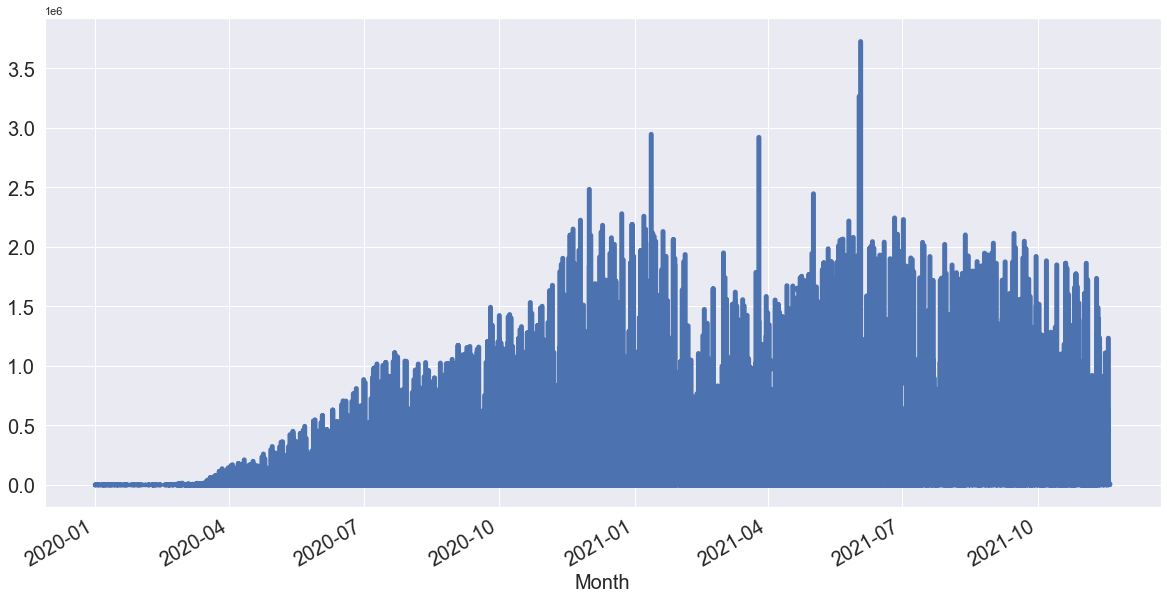

In [19]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

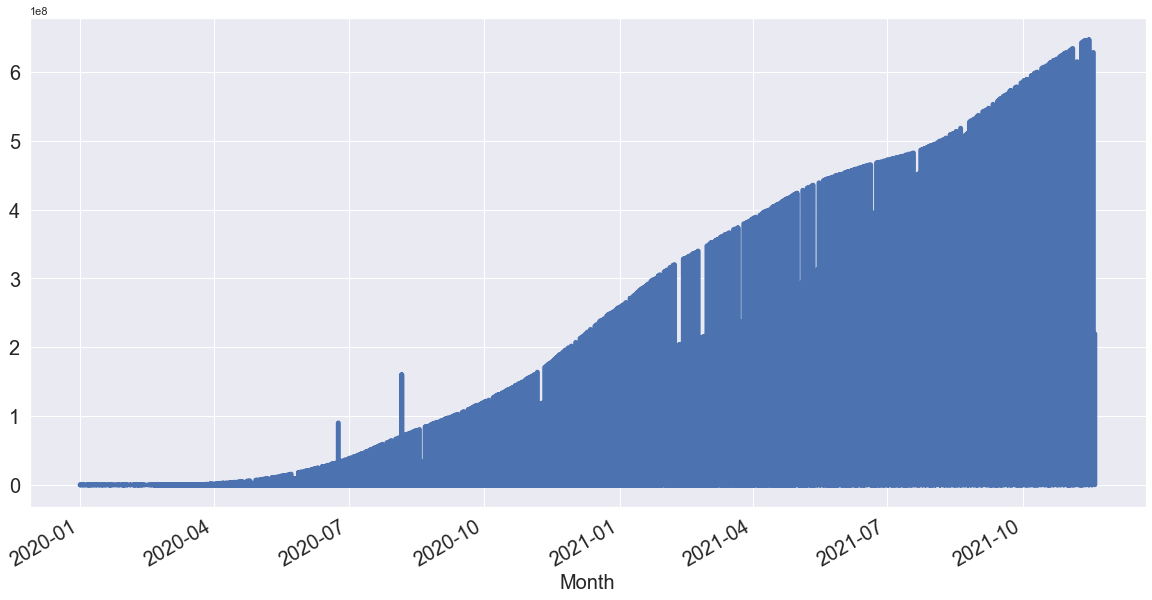

In [20]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

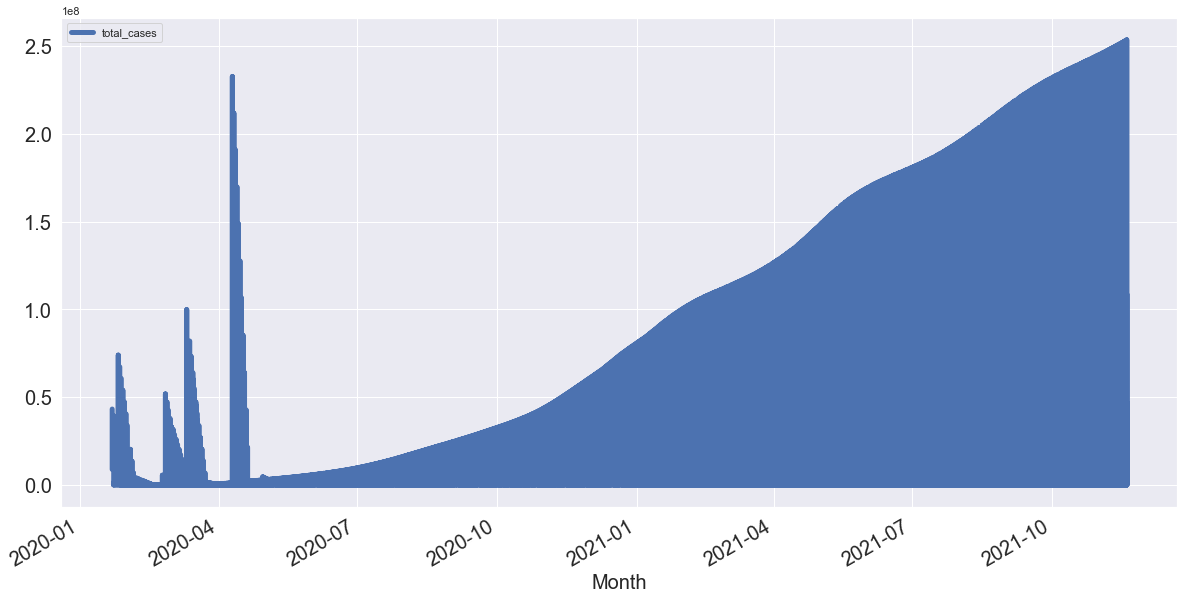

In [21]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

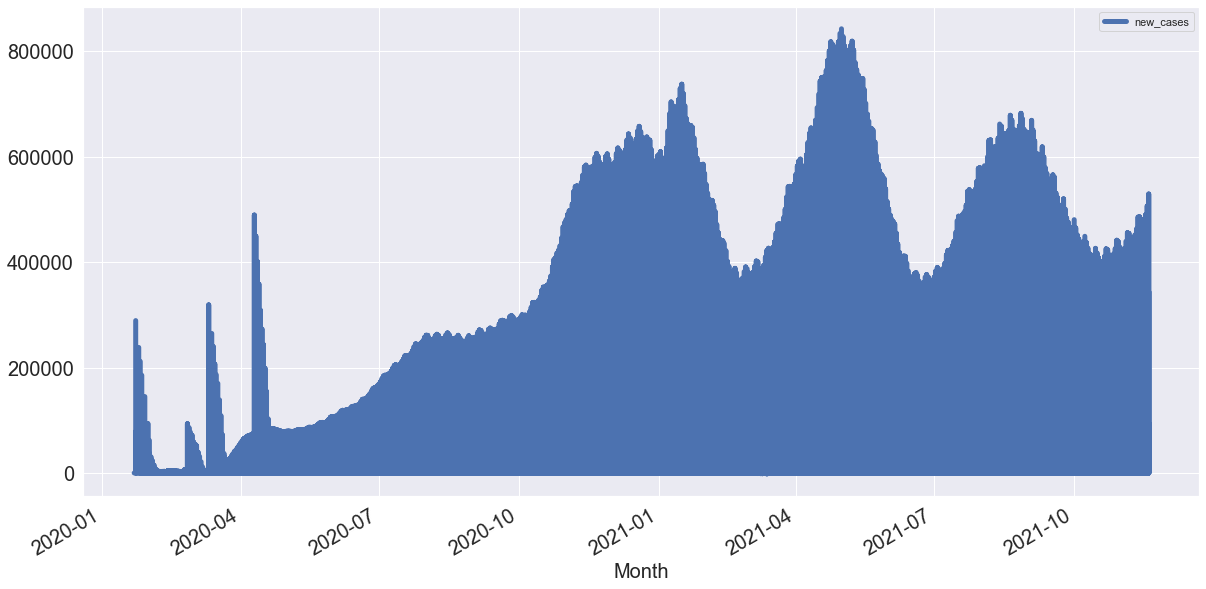

In [22]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

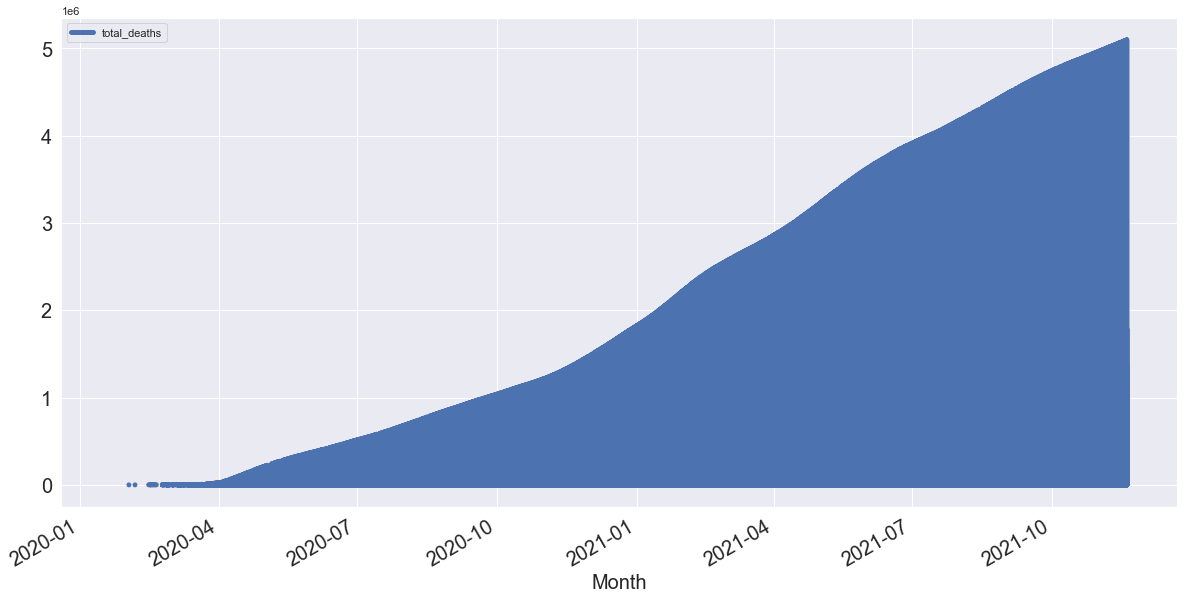

In [23]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

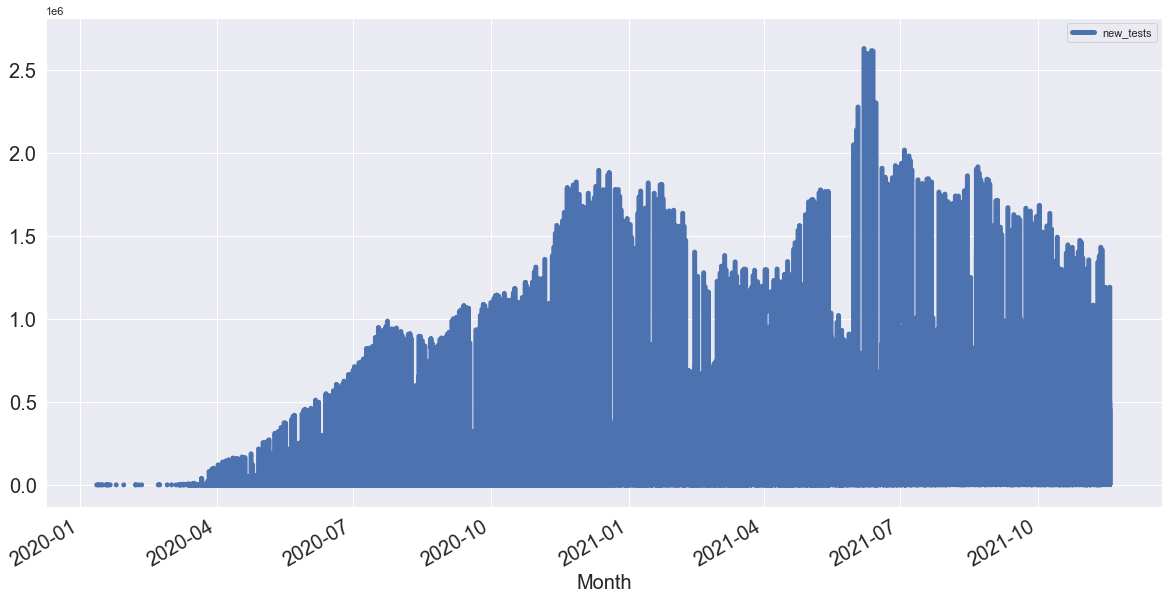

In [24]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

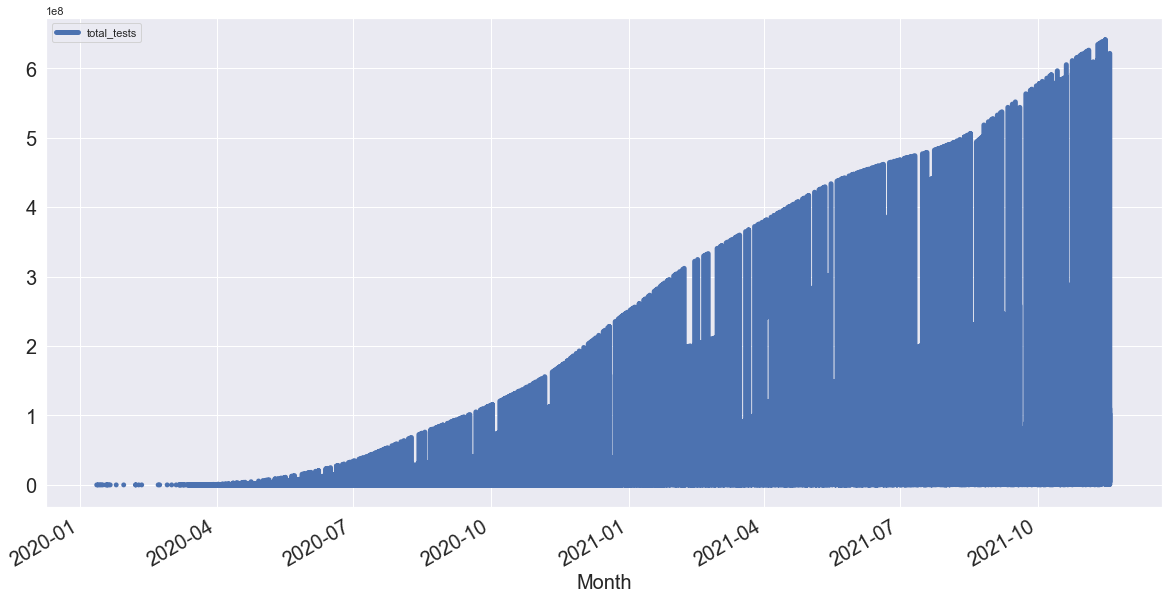

In [25]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

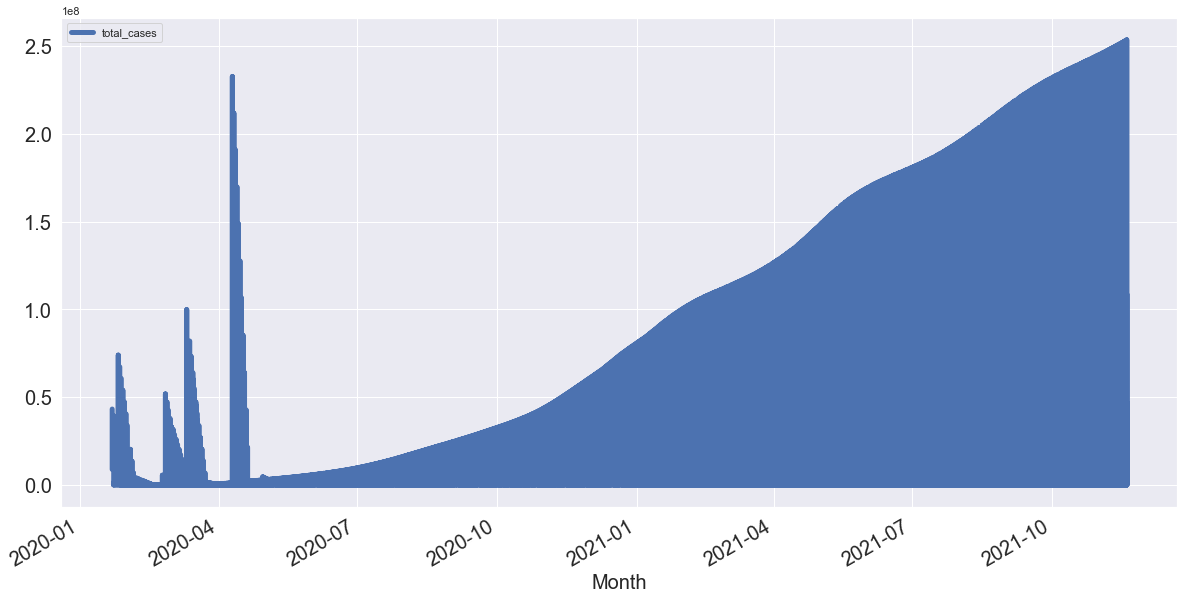

In [26]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);